<a href="https://colab.research.google.com/github/huzhengwei1993/DeOldify/blob/master/autoencoder_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# ax = plt.figure().add_subplot(111, projection = '3d')


In [0]:
#copyright
print('copyright @ Zhengwei Hu(huzhengwei1993@163.com)')

In [0]:
# load data. X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

In [38]:
# data preprocessing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# number of reduction dimension 
encoding_dim = 3

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [0]:
# encoder layer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
 
# decoder layer
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [0]:
#build your model
autoencoder = Model(inputs=input_img, outputs=decoded)
encoder = Model(inputs=input_img, outputs=encoder_output)

In [0]:
#compile model
autoencoder.compile(optimizer='adam', loss='mse')

In [44]:
# training
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0583
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0461
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0418
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0394
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0380
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0370
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0363
Epoch 8/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0357
Epoch 9/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0352
Epoch 10/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0349
Epoch 11/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0345
Epoch 12/20
60000/60000 [================

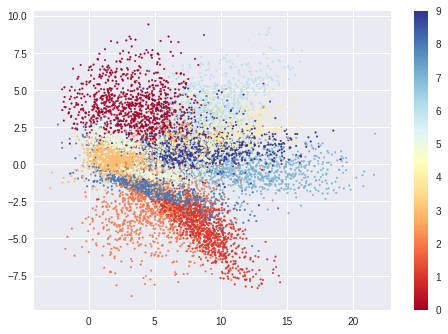

In [59]:
# plotting
encoded_imgs = encoder.predict(x_test)
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test,cmap=cm, s=3)
plt.colorbar()
plt.show()

In [0]:
#3D plotting
#encoded_imgs = encoder.predict(x_test)
# xs=encoded_imgs[:,0]
# ys=encoded_imgs[:,1]
# zs=encoded_imgs[:,2]

# ax.scatter(xs, ys, zs,marker = '.',c=y_test) 

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()